In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container {width: 100% !important}</style>"))

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# pd.options.display.max_rows = None
# pd.options.display.max_columns = None

# ETL Process

## Extract

In [3]:
df_date = pd.read_csv('Datsets/dim_date.csv') # checked : null, duplicate, data type
df_hotels = pd.read_csv('Datsets/dim_hotels.csv') # checked : null, duplicate, data type(property id fixed)
df_rooms = pd.read_csv('Datsets/dim_rooms.csv') # checked : null, duplicate, data type
df_bookings = pd.read_csv('Datsets/fact_bookings.csv') # checked : null(founded), duplicate, data type(property id fixed),outliers
df_agg_bookings = pd.read_csv('Datsets/fact_aggregated_bookings.csv') # checked : null, duplicate, data type(property id fixed)

## Trasform

### Explore

In [4]:
df_bookings.sample(10)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
21402,May142219558RT112,19558,2022-05-12,2022-05-14,2022-05-15,2,RT1,others,NaN,Checked Out,9750,9750
58261,Jun092219558RT33,19558,2022-06-04,2022-06-09,2022-06-15,2,RT3,direct offline,3.0,Checked Out,18000,18000
724,May012217561RT15,17561,2022-04-30,2022-05-01,2022-05-07,3,RT1,journey,NaN,Cancelled,12155,4862
97136,Jul052218560RT32,18560,2022-07-04,2022-07-05,2022-07-06,1,RT3,tripster,5.0,Checked Out,12000,12000
113190,Jul162216562RT115,16562,2022-07-16,2022-07-16,2022-07-21,2,RT1,others,NaN,Checked Out,9100,9100
107122,Jul112219561RT39,19561,2022-07-09,2022-07-11,2022-07-12,1,RT3,makeyourtrip,NaN,Checked Out,18000,18000
124789,Jul242218559RT27,18559,2022-07-21,2022-07-24,2022-07-25,4,RT2,direct offline,NaN,Checked Out,10800,10800
40318,May282216563RT220,16563,2022-05-27,2022-05-28,2022-05-29,1,RT2,logtrip,NaN,Checked Out,12600,12600
47931,Jun022219559RT26,19559,2022-06-02,2022-06-02,2022-06-03,2,RT2,others,NaN,Checked Out,13500,13500
47542,Jun022217563RT21,17563,2022-05-31,2022-06-02,2022-06-03,2,RT2,others,NaN,Checked Out,15300,15300


In [5]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [6]:
avg_rating = df_bookings['ratings_given'].mean()

In [7]:
df_bookings['ratings_given'] = df_bookings['ratings_given'].fillna(0)

df_bookings.loc[(df_bookings['booking_status'] == 'Checked Out') & (df_bookings['ratings_given'] == 0), 'ratings_given'] = avg_rating


In [8]:
df_bookings.sample(50)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
10917,May072217564RT21,17564,2022-05-06,2022-05-07,2022-05-12,1,RT2,logtrip,2.000000,Checked Out,15300,15300
80912,Jun252217560RT313,17560,2022-06-25,2022-06-25,2022-06-27,1,RT3,makeyourtrip,0.000000,Cancelled,20400,8160
59796,Jun102219561RT14,19561,2022-06-07,2022-06-10,2022-06-15,2,RT1,others,4.000000,Checked Out,9750,9750
82004,Jun262216558RT116,16558,2022-06-23,2022-06-26,2022-06-27,2,RT1,others,0.000000,Cancelled,9100,3640
38892,May272217559RT115,17559,2022-05-21,2022-05-27,2022-05-28,2,RT1,journey,5.000000,Checked Out,11050,11050
34776,May242217559RT220,17559,2022-04-30,2022-05-24,2022-05-25,1,RT2,others,3.619004,Checked Out,15300,15300
109961,Jul132219562RT37,19562,2022-07-10,2022-07-13,2022-07-14,2,RT3,others,1.000000,Checked Out,18000,18000
16252,May112217560RT34,17560,2022-05-09,2022-05-11,2022-05-13,5,RT3,tripster,3.000000,Checked Out,26520,26520
72966,Jun182217564RT45,17564,2022-06-18,2022-06-18,2022-06-19,5,RT4,makeyourtrip,3.619004,Checked Out,41990,41990
52961,Jun052217564RT214,17564,2022-06-04,2022-06-05,2022-06-07,4,RT2,tripster,3.000000,Checked Out,18360,18360


In [9]:
df_bookings['property_id'] = df_bookings['property_id'].astype('object')
df_agg_bookings['property_id'] = df_agg_bookings['property_id'].astype('object')
df_hotels['property_id'] = df_hotels['property_id'].astype('object')
df_bookings['ratings_given'] = df_bookings['ratings_given'].astype('int64')

In [10]:
df_bookings.duplicated().sum()

0

In [11]:
df_bookings.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')

<Axes: xlabel='room_category', ylabel='revenue_generated'>

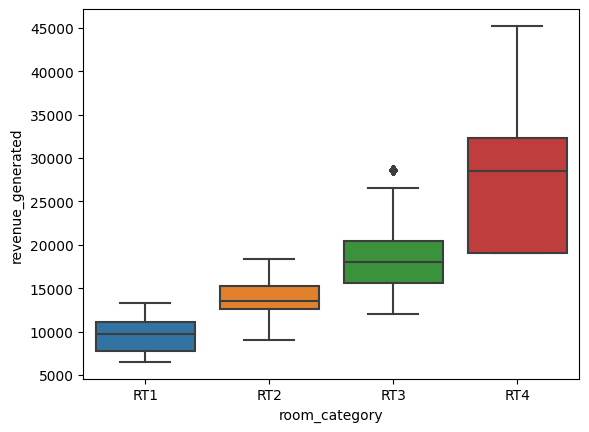

In [12]:
sns.boxplot(data=df_bookings, x = 'room_category',y= 'revenue_generated')

In [13]:
df_RT3 = df_bookings[df_bookings['room_category']== 'RT3']
df_RT3_revenue = df_RT3['revenue_generated']

iqr = np.percentile(df_RT3_revenue,75) - np.percentile(df_RT3_revenue,25)
upper_bound = np.percentile(df_RT3_revenue,75) + (iqr*1.5)

no_ouliers = np.sum(df_RT3_revenue > upper_bound)
no_ouliers

301

In [14]:
df_bookings[(df_bookings['revenue_generated'] > upper_bound) & (df_bookings['room_category'] =="RT3")]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
111,May012216559RT32,16559,2022-04-29,2022-05-01,2022-05-02,6,RT3,direct online,3,Checked Out,28560,28560
113,May012216559RT34,16559,2022-04-10,2022-05-01,2022-05-02,6,RT3,logtrip,3,Checked Out,28560,28560
133,May012216559RT324,16559,2022-04-28,2022-05-01,2022-05-06,6,RT3,makeyourtrip,0,Cancelled,28560,11424
534,May012217558RT315,17558,2022-04-29,2022-05-01,2022-05-06,6,RT3,others,3,Checked Out,28560,28560
537,May012217558RT318,17558,2022-04-28,2022-05-01,2022-05-02,6,RT3,makeyourtrip,0,Cancelled,28560,11424
...,...,...,...,...,...,...,...,...,...,...,...,...
133041,Jul312216559RT312,16559,2022-07-28,2022-07-31,2022-08-05,6,RT3,others,3,Checked Out,28560,28560
133444,Jul312217559RT38,17559,2022-07-29,2022-07-31,2022-08-01,6,RT3,makeyourtrip,3,Checked Out,28560,28560
133520,Jul312217560RT311,17560,2022-07-30,2022-07-31,2022-08-01,6,RT3,direct online,0,Cancelled,28560,11424
133625,Jul312217562RT311,17562,2022-07-28,2022-07-31,2022-08-01,6,RT3,logtrip,0,Cancelled,28560,11424


<Axes: xlabel='no_guests', ylabel='revenue_generated'>

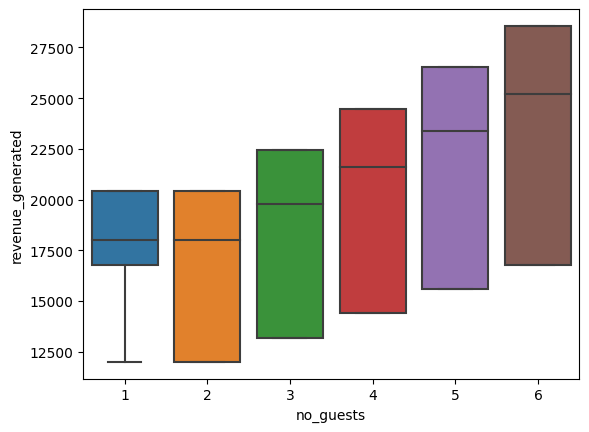

In [15]:
sns.boxplot(data=df_RT3, x = 'no_guests',y= 'revenue_generated')

In [16]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [17]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   object
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 359.5+ KB


In [18]:
df_agg_bookings['property_id'] = df_agg_bookings['property_id'].astype('object')

In [19]:
df_agg_bookings.duplicated().sum()

0

**After Exploration phase we don't need to clean.** so will go to Data modeling phase in power BI

In [20]:
df_date.to_csv('Datsets/dim_date(1).csv')
df_hotels.to_csv('Datsets/dim_hotels(1).csv')
df_rooms.to_csv('Datsets/dim_rooms(1).csv')
df_bookings.to_csv('Datsets/fact_bookings(1).csv')
df_agg_bookings.to_csv('Datsets/fact_aggregated_bookings(1).csv')